# Integration of multiple free electron bands

In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
from numpy.linalg import inv
import numpy as np
import matplotlib.pyplot as plt

In [35]:
from BZI.pseudopots import multiple_free_EPM, single_free_EPM, free_EPM
from BZI.plots import plot_band_structure, create_convergence_plot, plot_mesh
from BZI.sampling import make_cell_points, make_grid
from BZI.symmetry import make_lattice_vectors, make_rptvecs
from BZI.integration import rectangular_method
from BZI.tetrahedron import (grid_and_tetrahedra, calc_fermi_level, calc_total_energy)

<IPython.core.display.Javascript object>


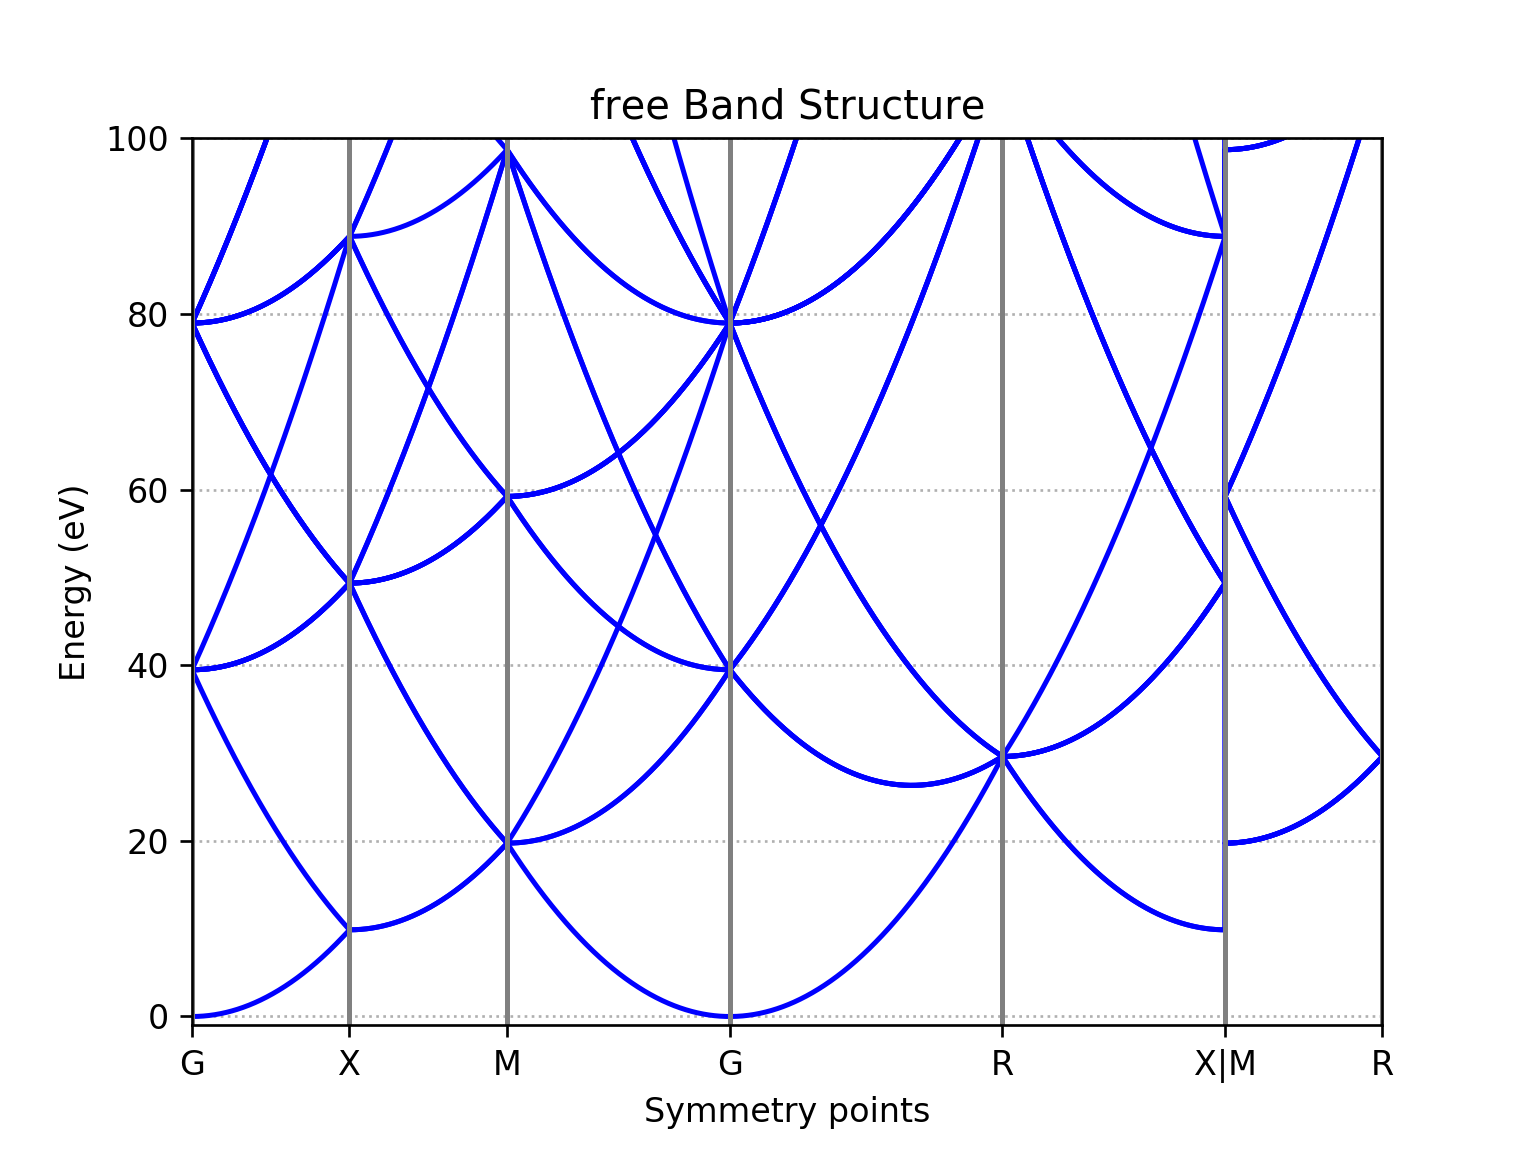

In [5]:
free_energy_shift = multiple_free_EPM.eval([0.]*3,1)[0]
free_args = {"materials_list": ["free"],
           "EPMlist": [multiple_free_EPM],
           "EPMargs_list": [{"neigvals": 1}],
           "lattice": free_EPM.lattice,
           "npts": 1000,
           "neigvals": 19,
           "energy_shift": free_energy_shift,
           "energy_limits": [-1,100],
           "show": True}

plot_band_structure(**free_args)

## Rectangular integration method

Make sure the grid is correct.

<IPython.core.display.Javascript object>


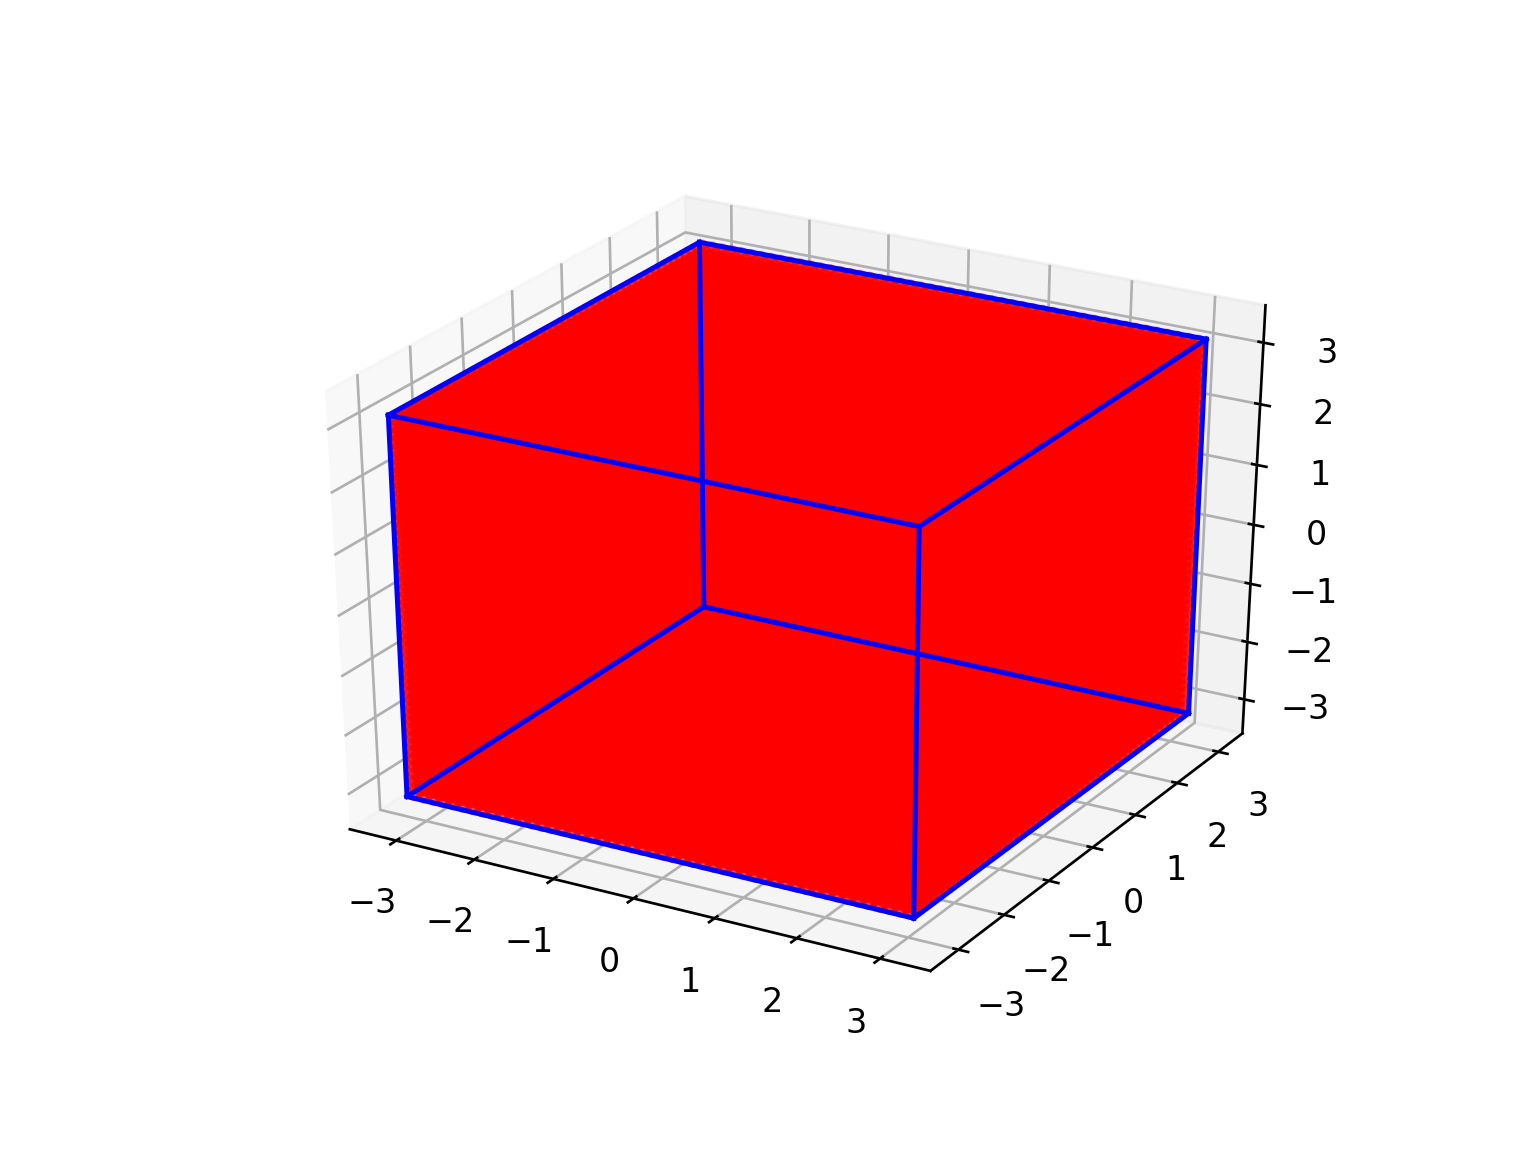

In [6]:
ndivisions = 50
grid_supercell_constants = np.array(multiple_free_EPM.lattice.constants)*ndivisions
grid_supercell_angles = multiple_free_EPM.lattice.angles
grid_supercell_type = multiple_free_EPM.lattice.type
grid_supercell_basis = make_lattice_vectors(grid_supercell_type, 
                                            grid_supercell_constants,
                                            grid_supercell_angles)
grid_basis = make_rptvecs(grid_supercell_basis, convention="angular")

offset = np.dot(inv(grid_basis), np.dot(multiple_free_EPM.lattice.reciprocal_vectors, [-1/2]*3)) + [1/2]*3
grid = make_grid(multiple_free_EPM.lattice.reciprocal_vectors, grid_basis, offset)
unit_cell_offset = np.dot(multiple_free_EPM.lattice.reciprocal_vectors, [-1/2]*3)
plot_mesh(grid, multiple_free_EPM.lattice.reciprocal_vectors, unit_cell_offset)

In [8]:
weights = np.ones(len(grid))
fermi_level, total_energy = rectangular_method(multiple_free_EPM, grid, weights)
print("total energy: ", total_energy)
print("answer: ", multiple_free_EPM.total_energy_ans)
print("percent error: ", abs(multiple_free_EPM.total_energy_ans - total_energy)/multiple_free_EPM.total_energy_ans)

total energy:  2366.54081994
answer:  2261.126462326125
percent error:  0.0466202839026


In [14]:
multiple_free_EPM.fermi_level = multiple_free_EPM.fermi_level_ans

total_energy_error_list = []
fermi_level_error_list = []
for ndivisions in range(4, 51, 5):
    print(ndivisions)
    grid_supercell_constants = np.array(multiple_free_EPM.lattice.constants)*ndivisions
    grid_supercell_angles = multiple_free_EPM.lattice.angles
    grid_supercell_type = multiple_free_EPM.lattice.type
    grid_supercell_basis = make_lattice_vectors(grid_supercell_type, 
                                                grid_supercell_constants,
                                                grid_supercell_angles)
    grid_basis = make_rptvecs(grid_supercell_basis, convention="angular")

    offset = np.dot(inv(grid_basis), np.dot(multiple_free_EPM.lattice.reciprocal_vectors, [-1/2]*3)) + [1/2]*3
    grid = make_grid(multiple_free_EPM.lattice.reciprocal_vectors, grid_basis, offset)

    weights = np.ones(len(grid))
    fermi_level, total_energy = rectangular_method(multiple_free_EPM, grid, weights)
    print("total energy: ", total_energy)
    print("total energy answer: ", multiple_free_EPM.total_energy_ans)
    print("fermi level: ", fermi_level)
    print("fermi level answer: ", multiple_free_EPM.fermi_level_ans)
    
    total_energy_error = abs(multiple_free_EPM.total_energy_ans - total_energy)
    fermi_level_error = abs(multiple_free_EPM.fermi_level_ans - fermi_level)
    total_energy_error_list.append(total_energy_error)
    fermi_level_error_list.append(fermi_level_error)

4
total energy:  2230.59660863
total energy answer:  2261.126462326125
fermi level:  16.6549574268
fermi level answer:  15.192666241151988
9
total energy:  2252.75762062
total energy answer:  2261.126462326125
fermi level:  14.6216361498
fermi level answer:  15.192666241151988
14
total energy:  2261.8408882
total energy answer:  2261.126462326125
fermi level:  15.0561822241
fermi level answer:  15.192666241151988
19
total energy:  2260.22737828
total energy answer:  2261.126462326125
fermi level:  15.0914726576
fermi level answer:  15.192666241151988
24
total energy:  2260.98956844
total energy answer:  2261.126462326125
fermi level:  15.2670443079
fermi level answer:  15.192666241151988
29
total energy:  2261.05412619
total energy answer:  2261.126462326125
fermi level:  15.2092833577
fermi level answer:  15.192666241151988
34
total energy:  2260.93760136
total energy answer:  2261.126462326125
fermi level:  15.1886040048
fermi level answer:  15.192666241151988
39
total energy:  2261.

<IPython.core.display.Javascript object>


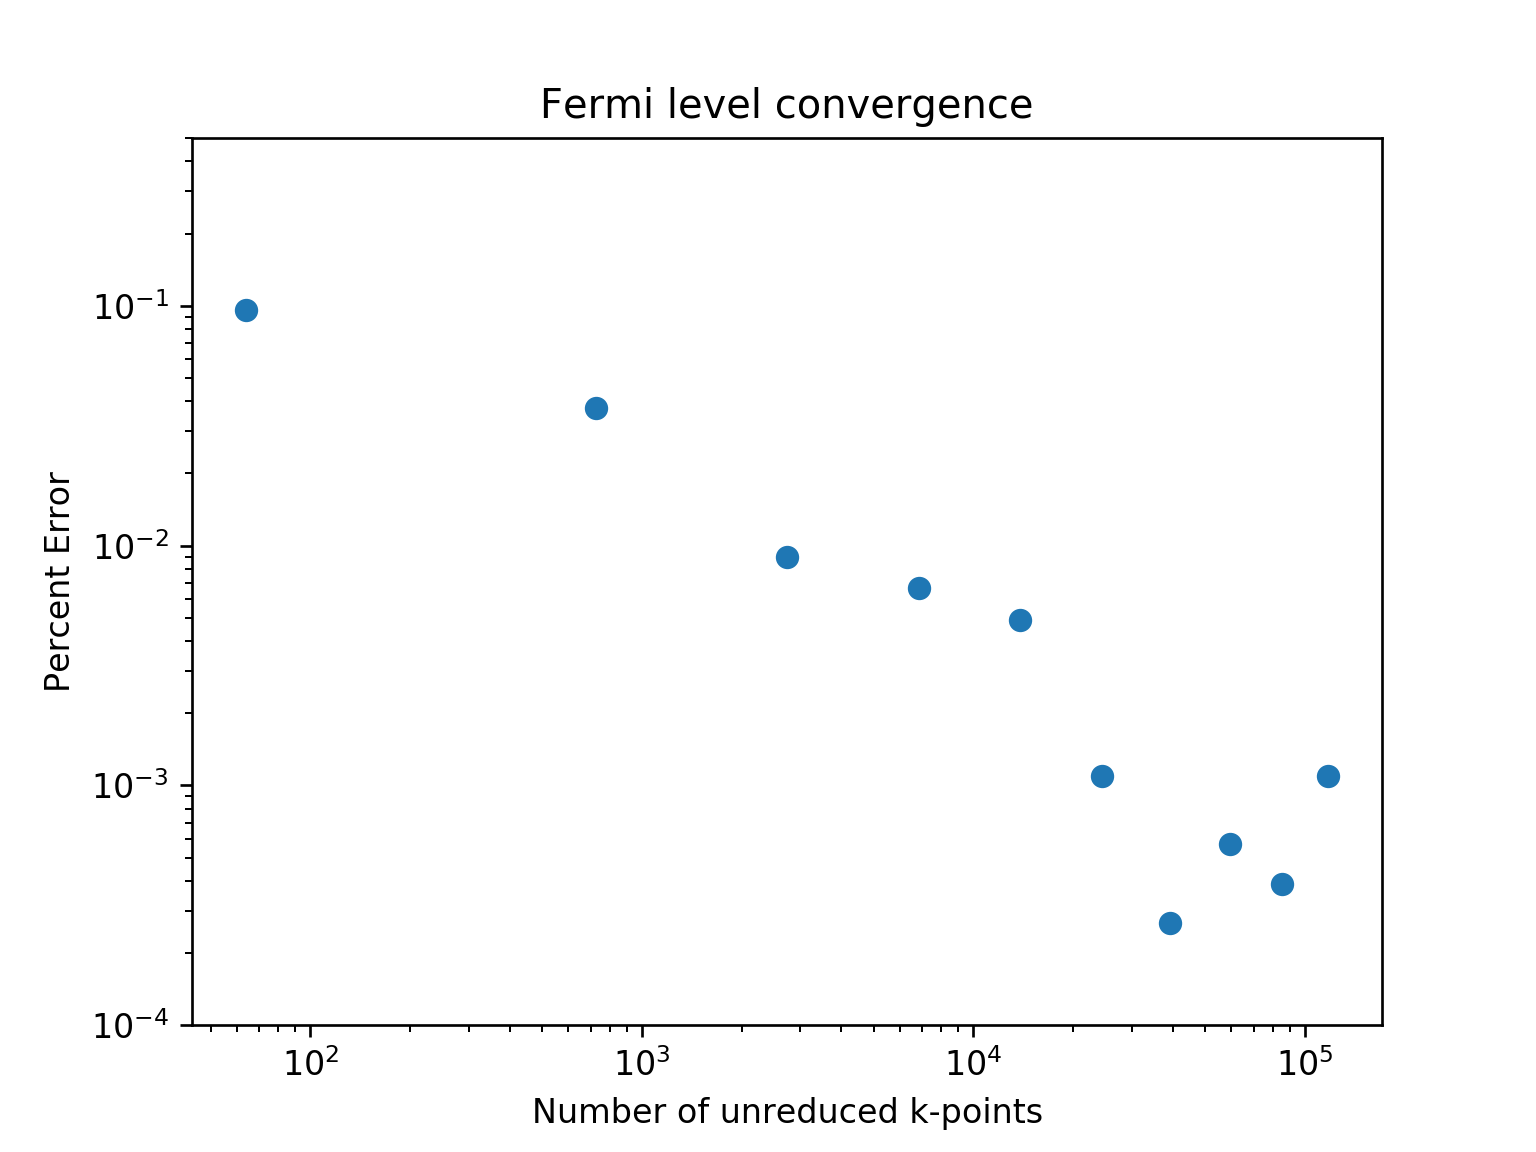

(0.0001, 0.5)

In [21]:
fig,ax = plt.subplots()
ndivs = [i**3 for i in range(4,51,5)]
ax.scatter(ndivs, fermi_level_error_list)
ax.set_title("Fermi level convergence")
ax.set_ylabel("Absolute Error")
ax.set_xlabel("Number of unreduced k-points")
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_ylim(1e-4,5e-1)

<IPython.core.display.Javascript object>


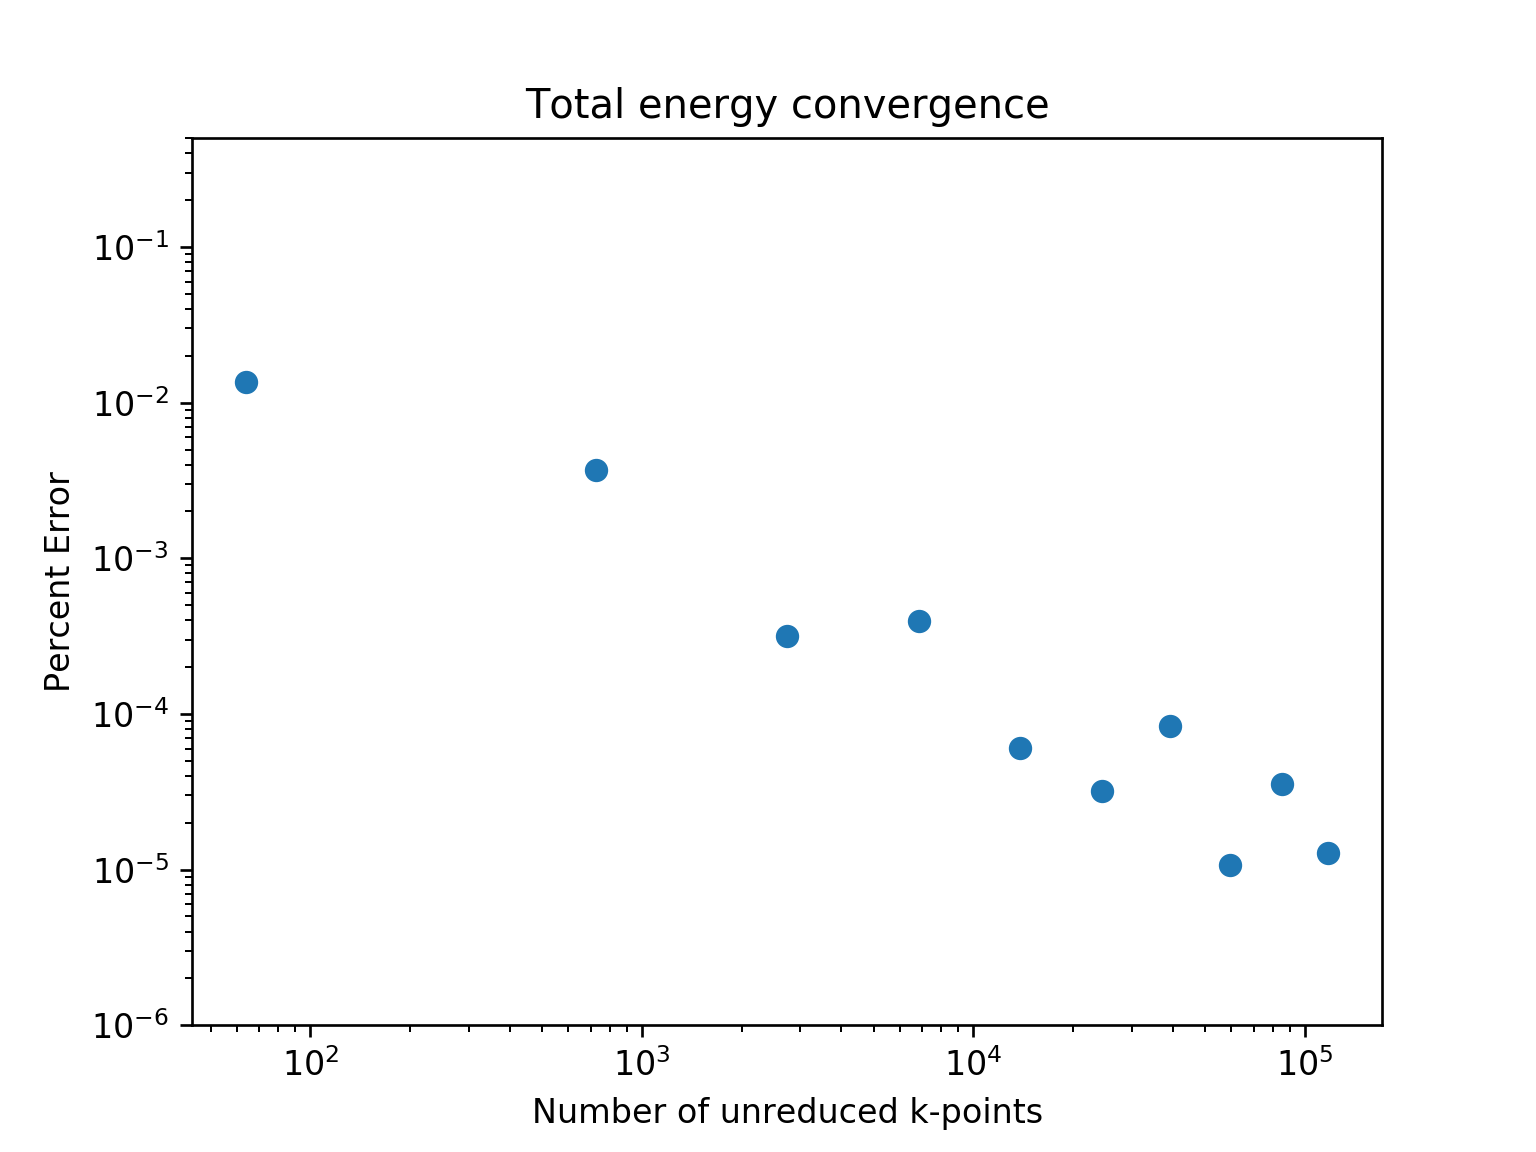

(1e-06, 0.5)

In [25]:
fig,ax = plt.subplots()
ndivs = [i**3 for i in range(4,51,5)]
ax.scatter(ndivs, total_energy_error_list)
ax.set_title("Total energy convergence")
ax.set_ylabel("Absolute Error")
ax.set_xlabel("Number of unreduced k-points")
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_ylim(1e-6, 5e-1)

In [50]:
multiple_free_EPM.total_energy_ans

2261.126462326125

## Tetrahedron integration method

In [45]:
ndivisions = 5
grid, tetrahedra = grid_and_tetrahedra(multiple_free_EPM, 
                                       ndivisions, lat_shift=[-.5]*3, grid_shift=[0.]*3)

<IPython.core.display.Javascript object>


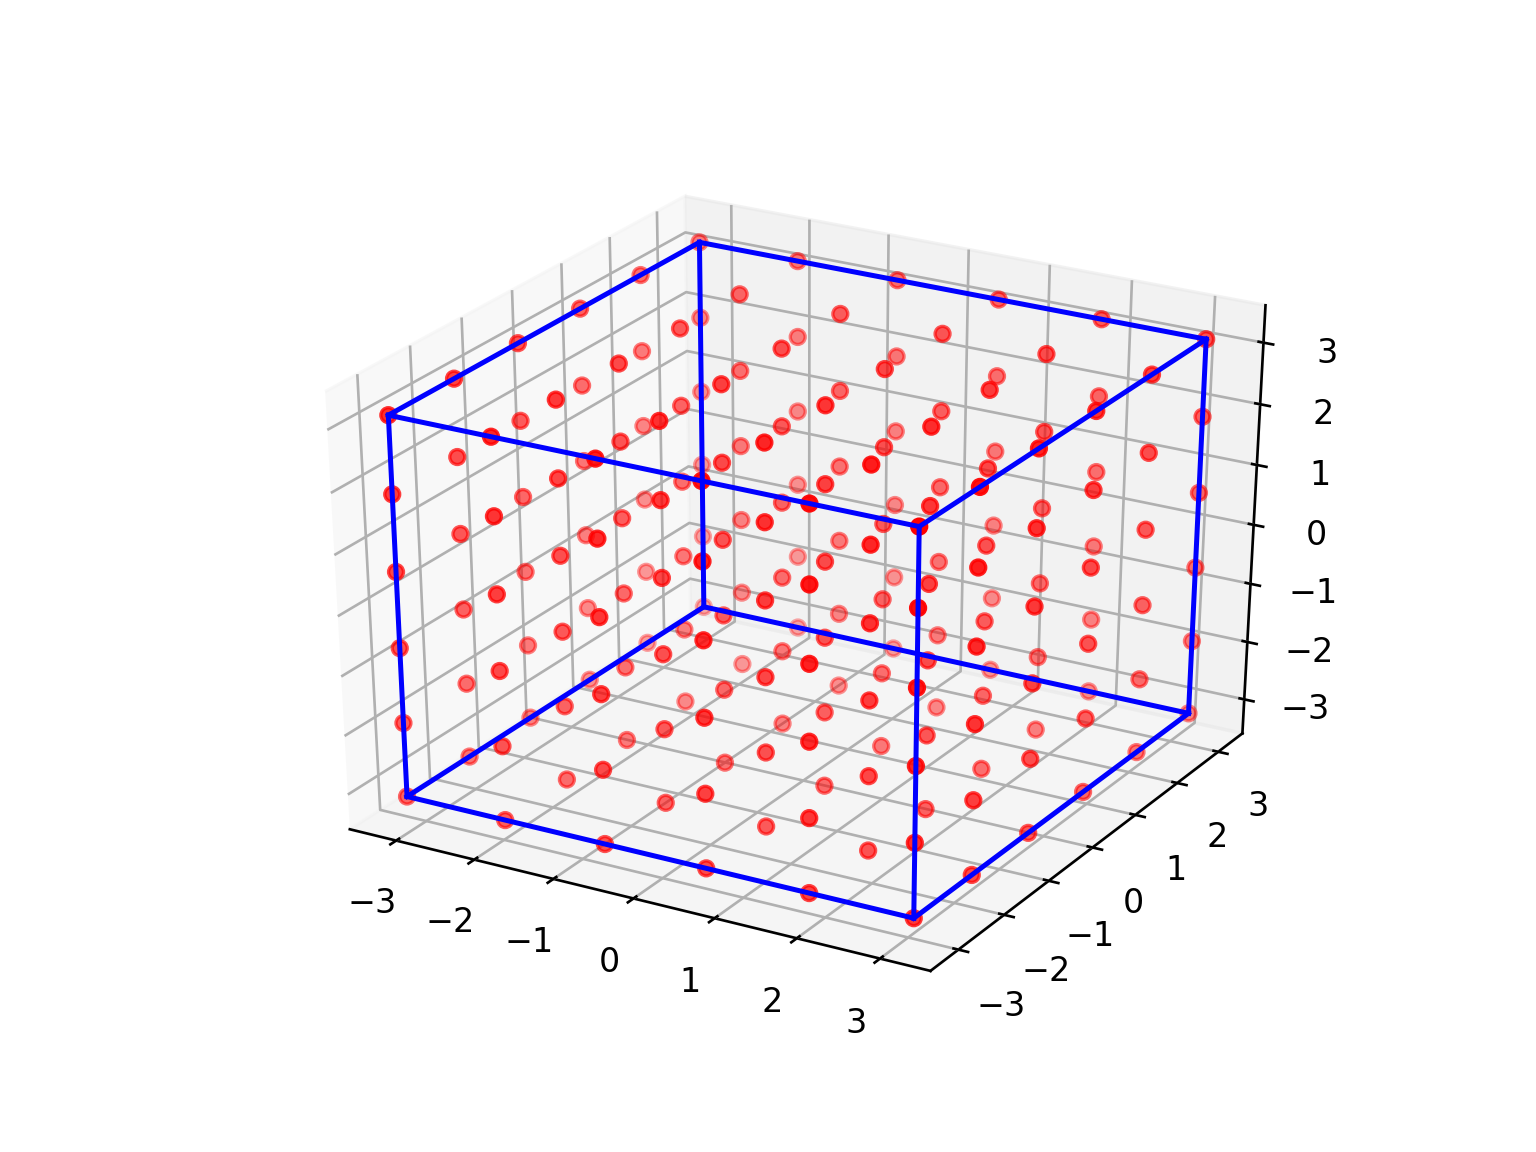

In [46]:
unit_cell_offset = np.dot(multiple_free_EPM.lattice.reciprocal_vectors, [-1/2]*3)
plot_mesh(grid, multiple_free_EPM.lattice.reciprocal_vectors, unit_cell_offset)

In [47]:
weights = np.ones(len(tetrahedra))
fermi_level = calc_fermi_level(multiple_free_EPM, tetrahedra, weights, grid)

In [48]:
total_energy = calc_total_energy(multiple_free_EPM, tetrahedra, weights, grid)

In [49]:
print("fermi level: ", fermi_level)
print("fermi level answer: ", multiple_free_EPM.fermi_level_ans)
print("total energy: ", total_energy)
print("total energy: ", multiple_free_EPM.total_energy_ans)

fermi level:  17.8354732684
fermi level answer:  15.192666241151988
total energy:  1763.9910127242697
total energy:  2261.126462326125


In [ ]:
fermi_level_error_list = []
total_energy_error_list = []
for ndivisions in range(2, 7):
    grid, tetrahedra = grid_and_tetrahedra(multiple_free_EPM, 
                                           ndivisions, lat_shift=[-.5]*3, grid_shift=[0.]*3)
    
    weights = np.ones(len(tetrahedra))
    fermi_level = calc_fermi_level(multiple_free_EPM, tetrahedra, weights, grid)
    total_energy = calc_total_energy(multiple_free_EPM, tetrahedra, weights, grid)